In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Simple 2 layers Neural Netwok


In [ ]:

class two_layers_neural_net:
  def __init__(self,input,y):
    self.input=input
    self.input_shape=self.input.shape        #n[0] x m .....3x8
    self.y=y                    #n[l] x 1   ............2x8
    self.weights1   = np.random.rand(self.input.shape[1],3) 
    self.weights2   = np.random.rand(3,1) 
    layer_weights=np.random.rand(self.nodes_per_layer[0],self.input_shape[0])*0.01
    layer_bias=np.zeros((self.nodes_per_layer[0],1))
    self.weights.append(layer_weights)
    self.b.append(layer_bias)
    print( 'layer 1 weights shape is',layer_weights.shape)
    print( 'layer 1 weights  is \n',layer_weights)

    print( 'layer 1 bias shape is',layer_bias.shape)
    print( 'layer 1  bias  is',layer_bias)

In [ ]:
# np.random.seed(90) 

# r=np.random.rand(10)
# r1=np.random.rand(10)
# print(r)
# print(r1)

# np.random.seed(90) 

# r=np.random.rand(10)
# r1=np.random.rand(10)
# print(r)
# print(r1)

Simple Neural Network

In [ ]:


      
        

class neural_net:
  def __init__(self,input,nodes_per_layer,activations,y):
#     x shape is  (3, 8)
#     X  is 
#      [[ 3  4  3 33 23 53  3 33]
#       [ 4  1  9 42 44 64 64 34]
#       [ 2  2  4  2 25 72  2 42]]
#     y shape is (2, 8)
#     y  is 
#       [[1 0 1 0 0 1 1 1]
#        [1 1 0 0 1 0 1 0]]

    self.input=input
    self.input_shape=self.input.shape        #n[0] x m .....3x8
    self.num_samples=self.input.shape[1]           # 8
    self.nodes_per_layer=nodes_per_layer
    self.activations=activations
    self.y=y                    #n[l] x 1   ............2x8
    self.weights=[]
    self.b=[]
    layer_weights=np.random.rand(self.nodes_per_layer[0],self.input_shape[0])*0.01
    layer_bias=np.zeros((self.nodes_per_layer[0],1))
    self.weights.append(layer_weights)
    self.b.append(layer_bias)
    print( 'layer 1 weights shape is',layer_weights.shape)
    print( 'layer 1 weights  is \n',layer_weights)

    print( 'layer 1 bias shape is',layer_bias.shape)
    print( 'layer 1  bias  is',layer_bias)


    for i in range(self.nodes_per_layer.shape[0]-1):    #[4,3,2]
      layer_weights=np.random.rand(self.nodes_per_layer[i+1],self.nodes_per_layer[i])*0.01
      self.weights.append(layer_weights)
      layer_bias=np.zeros((self.nodes_per_layer[i+1],1))
      self.b.append(layer_bias)
      print( 'layer ',str(i+2) ,' weights shape is',layer_weights.shape)
      print( 'layer ',str(i+2) ,' weights  is \n',layer_weights)

      print( 'layer ',str(i+2) ,' bias shape is',layer_bias.shape)
      print( 'layer ',str(i+2) ,' bias  is \n',layer_bias)

    

  def forward_propagation(self):
    print('forward propadation')

    self.a=[]         #[4,1],[3,1],[2,1]
    z=np.dot(self.weights[0] , self.input) + self.b[0]
    self.layer_output =self.Activation(z,self.activations[0]) 
    self.a.append(self.layer_output)
    # print('layer 1 output \n',self.layer_output)

    for i in range(1,self.nodes_per_layer.shape[0]):    #[4,3,2]
      z=np.dot(self.weights[i] , self.layer_output) + self.b[i]
      self.layer_output=self.Activation(z,self.activations[i]) 
      self.a.append(self.layer_output)
      # print('layer ' , str(i+1) ,' output \n',self.layer_output)

    # print('a= \n',self.a)


  def back_propagation(self):
    print('backpropagation')
    self.dz=np.empty_like(np.asarray(self.a))
    self.dW=np.empty_like(np.asarray(self.weights))
    self.db=np.empty_like(np.asarray(self.b))

    self.dz[-1]=(self.a[-1]-self.y)
    self.dW[-1]=np.dot(self.dz[-1] , self.a[-2].T) * (1/self.num_samples)
    self.db[-1]=np.sum(self.dz[-1],axis=0,keepdims=True).T * (1/self.num_samples)

    for i in range(-(self.nodes_per_layer.shape[0]-2),1):    #[4,3,2]
      i=-i             #1,0
      self.dz[i]=np.dot(self.weights[i+1].T ,self.dz[i+1]) * ( self.a[i]*(1-self.a[i]) )
      self.db[i]=np.sum(self.dz[i],axis=0,keepdims=True).T * (1/self.num_samples)

      if(i!=0):
        self.dW[i]=np.dot(self.dz[i] , self.a[i-1].T) * (1/self.num_samples)

      elif(i==0):
        self.dW[i]=np.dot(self.dz[i] , self.input.T) * (1/self.num_samples)


    self.gradient_discent(self.weights,self.dW,0.01)

  def gradient_discent(self,w,dw,lr):
    self.weights=w-lr * dw

    
  def train(self,epoch):
    self.loss=[]
    for i in range(epoch):
      print ('epoch ',str(i+1))
      self.forward_propagation()
      self.loss.append(self.cross_entropy_loss(self.a[-1],self.y))
      self.back_propagation()
      print('loss= ',self.loss[i])
    plt.plot(self.loss)
    plt.ylabel('loss')
    plt.show()

    return self.loss,self.weights

  def sigmoid(self,z):
    s= 1/(1 + np.exp(-z)) 
    return s

  def Relu(self,z):
    return np.maximum(0,z)

  def tanh(self,z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

  def softmax(self,y):
    exps = np.exp(y)
    return exps / np.sum(exps)

  def Activation(self,z,method='sigmoid'):
    
      if (method=='sigmoid'):
        return self.sigmoid(z)
      elif(method=='tanh'):
        return delf.tanh(z)
      elif (method=='Relu'):
        return delf.Relu(z)
        
    

  def Activation_derivative(self,a,activation='sigmoid'):
    if (activation=='sigmoid'):
      return a(1-a)
    elif (activation=='tanh'):
      return 1-a
    elif (activation=='Relu'):
      return np.minimum(-np.maximum(0,z),1)

  def cross_entropy_loss(self,a, y):
    return - np.mean(
        np.multiply(y, np.log(a)) + np.multiply((1-y), np.log(1-a)))
  

In [ ]:
nn.weights[2]

array([[0.19658121, 0.89751183, 0.02228812],
       [0.9295796 , 0.88364449, 0.88045702]])

In [ ]:
nn.weights[2].T.shape

(3, 2)

In [ ]:
nn.dz[2]

array([[-0.20888674,  0.79107993, -0.20876549,  0.79134245,  0.79134245,
        -0.20865755, -0.20877853, -0.20865755],
       [-0.06710439, -0.06709321,  0.93300826,  0.93314711, -0.06685289,
         0.93314711, -0.06701088,  0.93314711]])

In [ ]:
# (nn.a[2]*(1-nn.a[2])).shape
np.dot(nn.weights[2].T ,nn.dz[2]).shape

(3, 8)

In [ ]:

(nn.a[2]*(1-nn.a[2])).shape

(2, 8)

In [ ]:
X=np.array([[3,4,2] ,[4,1,2],[3,9,4],[33,42,2],[23,44,25],[53,64,72],[3,64,2],[33,34,42]]).T
print('x shape is ',X.shape)

print('X  is \n',X)
# print('X.T  is \n',X.T)

# w=np.random.randn(4,3)
# print('w = \n',w)
y=np.array([[1,1],[0,1],[1,0],[0,0],[0,1],[1,0],[1,1],[1,0]]).T
print('y shape is \n',y.shape)
print('y  is \n',y)

# print('w dot X= \n',w.dot(X.T))

nn=neural_net(X,np.array([4,3,2]),np.array(['sigmoid','sigmoid','sigmoid']),y)   #  (self,input,nodes_per_layer,activations,y):


x shape is  (3, 8)
X  is 
 [[ 3  4  3 33 23 53  3 33]
 [ 4  1  9 42 44 64 64 34]
 [ 2  2  4  2 25 72  2 42]]
y shape is 
 (2, 8)
y  is 
 [[1 0 1 0 0 1 1 1]
 [1 1 0 0 1 0 1 0]]
layer 1 weights shape is (4, 3)
layer 1 weights  is 
 [[0.00388423 0.00707655 0.00959098]
 [0.00794527 0.00347766 0.0021746 ]
 [0.00842831 0.00782939 0.00466523]
 [0.00492321 0.00754987 0.00878896]]
layer 1 bias shape is (4, 1)
layer 1  bias  is [[0.]
 [0.]
 [0.]
 [0.]]
layer  2  weights shape is (3, 4)
layer  2  weights  is 
 [[0.00688052 0.00856036 0.00759095 0.00304715]
 [0.00912847 0.0006284  0.00188361 0.00398751]
 [0.00395264 0.00761594 0.00371905 0.00449489]]
layer  2  bias shape is (3, 1)
layer  2  bias  is 
 [[0.]
 [0.]
 [0.]]
layer  3  weights shape is (2, 3)
layer  3  weights  is 
 [[0.00453729 0.00011229 0.00051757]
 [0.00073397 0.00400627 0.00897952]]
layer  3  bias shape is (2, 1)
layer  3  bias  is 
 [[0.]
 [0.]]


epoch  1
forward propadation
backpropagation
loss=  0.6929883926572735
epoch  2
forward propadation
backpropagation
loss=  0.6929296703511896
epoch  3
forward propadation
backpropagation
loss=  0.6928711707285004
epoch  4
forward propadation
backpropagation
loss=  0.6928128929048596
epoch  5
forward propadation
backpropagation
loss=  0.6927548359998131
epoch  6
forward propadation
backpropagation
loss=  0.6926969991367771
epoch  7
forward propadation
backpropagation
loss=  0.6926393814430183
epoch  8
forward propadation
backpropagation
loss=  0.6925819820496335
epoch  9
forward propadation
backpropagation
loss=  0.6925248000915294
epoch  10
forward propadation
backpropagation
loss=  0.6924678347074018
epoch  11
forward propadation
backpropagation
loss=  0.6924110850397163
epoch  12
forward propadation
backpropagation
loss=  0.6923545502346882
epoch  13
forward propadation
backpropagation
loss=  0.6922982294422623
epoch  14
forward propadation
backpropagation
loss=  0.6922421218160943
e

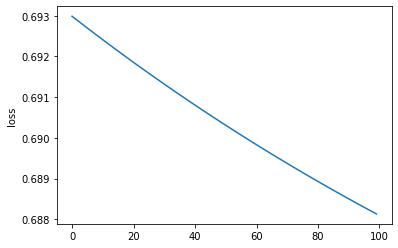

([0.6929883926572735,
  0.6929296703511896,
  0.6928711707285004,
  0.6928128929048596,
  0.6927548359998131,
  0.6926969991367771,
  0.6926393814430183,
  0.6925819820496335,
  0.6925248000915294,
  0.6924678347074018,
  0.6924110850397163,
  0.6923545502346882,
  0.6922982294422623,
  0.6922421218160943,
  0.6921862265135309,
  0.6921305426955895,
  0.6920750695269404,
  0.6920198061758872,
  0.6919647518143476,
  0.6919099056178348,
  0.691855266765439,
  0.6918008344398082,
  0.6917466078271308,
  0.6916925861171161,
  0.6916387685029768,
  0.6915851541814111,
  0.6915317423525836,
  0.6914785322201095,
  0.6914255229910344,
  0.691372713875819,
  0.6913201040883195,
  0.6912676928457719,
  0.6912154793687744,
  0.6911634628812688,
  0.6911116426105259,
  0.6910600177871266,
  0.6910085876449453,
  0.6909573514211348,
  0.6909063083561073,
  0.69085545769352,
  0.6908047986802575,
  0.6907543305664156,
  0.6907040526052857,
  0.6906539640533382,
  0.6906040641702071,
  0.6905543522

In [ ]:
nn.train(100)



In [ ]:
nn.dW[1].shape

(2, 3)

In [ ]:
nn.weights[1].shape

(3, 4)

In [ ]:
a =np.array([[1,2,3],[4,2,5]])
b =np.array([[-1,-2,1],[4,-3,1],[1,2,9]])
c=a.dot(b)
c

array([[10, -2, 30],
       [ 9, -4, 51]])

In [ ]:
w=np.array([[-1,-2],[4,-3],[1,2]])
w.shape

(3, 2)

In [ ]:
a=[]
X=np.array([[1,2],[5,6]])
X

array([[1, 2],
       [5, 6]])

In [ ]:
def sigmoid(z):
  s= 1/(1 + np.exp(-z)) 
  return s
def Relu(z):
  return np.maximum(0,z)

def tanh(z):
  return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def softmax(y):
  exps = np.exp(y)
  return exps / np.sum(exps)

def Activation(z,method='sigmoid'):
  if (method=='sigmoid'):
    print('activation =sigmoid')
    return sigmoid(z)
  elif (method=='Relu'):
    return Relu(z)

z=np.dot(w , X).T
layer_output =Activation(z,'sigmoid') 
a.append(layer_output)
print(z)
print(np.sum(z,axis=0,keepdims=True).T.shape)

activation =sigmoid
[[-11 -11  11]
 [-14 -10  14]]
(3, 1)


In [ ]:
for i in range(4):
  
  print (i)

0
1
2
3


In [ ]:
dic={2:'sigmoid',3:"Relu"}

In [ ]:
dic.keys()

dict_keys([2, 3])

In [ ]:
net=neural_net(np.array([2,4,5]),{4:'sigmoid',3:'sigmoid',2:'Relu'})

TypeError: ignored

In [ ]:
net.input

array([2, 4, 5])

In [ ]:
input=np.array([[1,2,3],[1,2,3]])

In [ ]:
input.size[1]

TypeError: ignored

In [ ]:
input.shape

(3,)

In [ ]:
for i in input:
  print (i)

1
2
3
